In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#fig=plt.figure(figsize=(50, 50))
sns.set_style("whitegrid")

In [2]:
HRdata = pd.read_csv("C:\\Users\\Aswathi\\Desktop\\IBMdata.csv");

In [3]:
HRdata.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
HRdata.info()
#there are no null values! We don't need to do data cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [5]:
HRdata.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
HRdata['Attrition']=HRdata['Attrition'].replace('Yes',1)

In [7]:
HRdata['Attrition']=HRdata['Attrition'].replace('No',0)

In [8]:
corr = HRdata.corr()

In [9]:
sns.heatmap(corr,xticklabels = corr.columns.values, yticklabels = corr.columns.values)

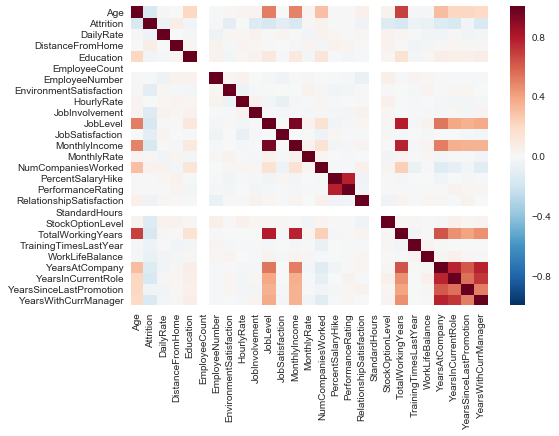

In [10]:
plt.show()

In [11]:
#What are the factors that affect attrition rate proportionately or inversely ? 
# 1. What is the impact of Age on attrition rate ? Does increase in age or seniority impact attrition ? 

sns.regplot(x = HRdata.Age, y = HRdata.Attrition, data = HRdata)
# We cannot determine from this if there is any co-relation between Age and Attrition
# But we can see from the regression line, as the age increases the regression line decreases
# So may be we can say that, as people age they get comfortable at a job and thus they are very unlikely to leave. 
#sns.barplot(x = HRdata.Attrition, y = HRdata.Age, data = HRdata)

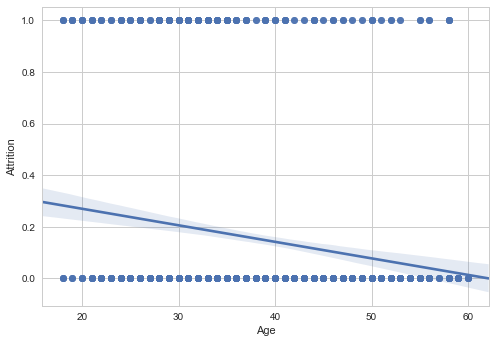

In [12]:
plt.show()

In [13]:
# Let's check out if there is any relationship between travel and attrition ?
sns.countplot(x="BusinessTravel", hue = 'Attrition', data=HRdata).set_title('Employee Travel Turnover Distribution');

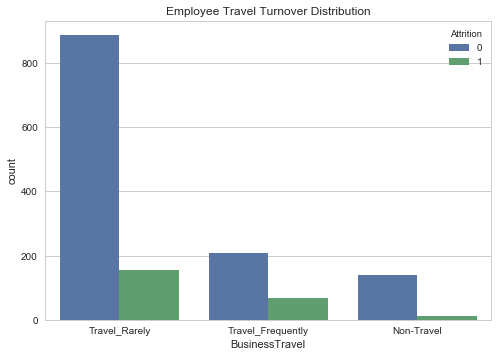

In [14]:
plt.show()

In [15]:
Travelcount = HRdata.groupby(['BusinessTravel','Attrition'],as_index=False)['Age'].count()
Travelcount

,BusinessTravel,Attrition,Age
0,Non-Travel,0,138
1,Non-Travel,1,12
2,Travel_Frequently,0,208
3,Travel_Frequently,1,69
4,Travel_Rarely,0,887
5,Travel_Rarely,1,156


In [16]:
Travelcount = Travelcount.rename(columns= {'Age':'Count'})
Travelcount

,BusinessTravel,Attrition,Count
0,Non-Travel,0,138
1,Non-Travel,1,12
2,Travel_Frequently,0,208
3,Travel_Frequently,1,69
4,Travel_Rarely,0,887
5,Travel_Rarely,1,156


In [17]:
Travelcount = pd.DataFrame(Travelcount)
Travelcount

,BusinessTravel,Attrition,Count
0,Non-Travel,0,138
1,Non-Travel,1,12
2,Travel_Frequently,0,208
3,Travel_Frequently,1,69
4,Travel_Rarely,0,887
5,Travel_Rarely,1,156


In [18]:
Travelcount_1= HRdata.groupby(['BusinessTravel'],as_index=False)['Age'].count()

In [19]:
Travelcount_1 = Travelcount_1.rename(columns = {'Age' : 'Sum'})

In [20]:
Travelcount_1 = pd.DataFrame(Travelcount_1)
Travelcount_1

,BusinessTravel,Sum
0,Non-Travel,150
1,Travel_Frequently,277
2,Travel_Rarely,1043


In [21]:
Travelcount = pd.merge(Travelcount,Travelcount_1, on = 'BusinessTravel')

In [22]:
Travelcount

,BusinessTravel,Attrition,Count,Sum
0,Non-Travel,0,138,150
1,Non-Travel,1,12,150
2,Travel_Frequently,0,208,277
3,Travel_Frequently,1,69,277
4,Travel_Rarely,0,887,1043
5,Travel_Rarely,1,156,1043


In [23]:
Travelcount['PercentAttrition'] = (Travelcount['Count']/Travelcount['Sum'])*100

In [24]:
Travelcount
#From the below calculation we can see that the percentage of attrition in people who Travel Frequently is more that the 
#categories. Therefore, we can say that BusinessTravel does have an impact on attrition. 

,BusinessTravel,Attrition,Count,Sum,PercentAttrition
0,Non-Travel,0,138,150,92.000000
1,Non-Travel,1,12,150,8.000000
2,Travel_Frequently,0,208,277,75.090253
3,Travel_Frequently,1,69,277,24.909747
4,Travel_Rarely,0,887,1043,85.043145
5,Travel_Rarely,1,156,1043,14.956855


In [25]:
# Let's find out which department has the most people leaving! 
sns.countplot(x="Department", hue = 'Attrition', data=HRdata).set_title('Employee Department Turnover Distribution');
# We can see that R&D has the most people leaving

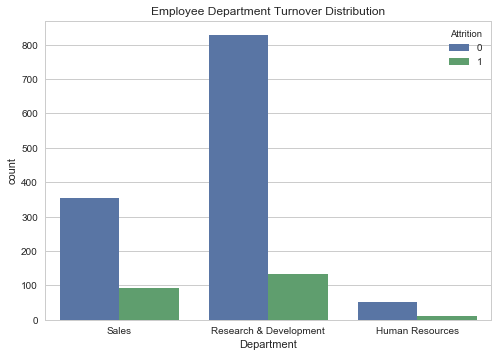

In [26]:
plt.show()

In [27]:
# People who did more over time tend to leave the company 
sns.countplot(x="OverTime", hue = 'Attrition', data=HRdata).set_title('Employee Department Turnover Distribution');

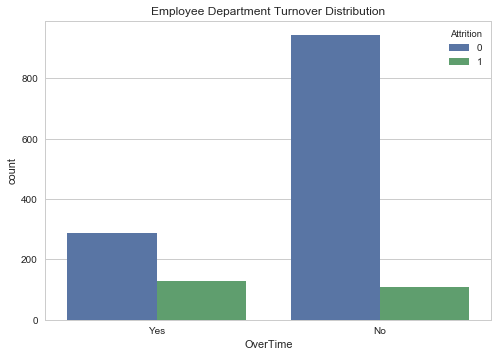

In [28]:
plt.show()

In [29]:
# Therefore people who have spent less time in the company, tend to leave the company 
sns.countplot(x="YearsAtCompany", hue = 'Attrition', data=HRdata).set_title('Employee Department Turnover Distribution');

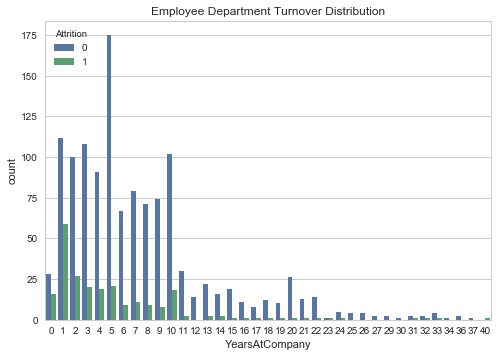

In [30]:
plt.show()

In [31]:
sns.countplot(y="JobRole", hue = 'Attrition', data=HRdata).set_title('Employee Department Turnover Distribution');

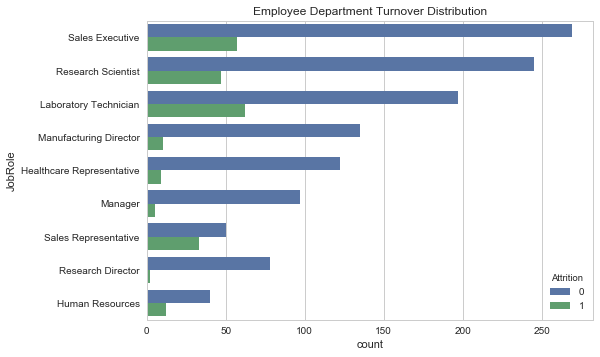

In [32]:
plt.show()

In [33]:
ax=sns.kdeplot(HRdata.loc[(HRdata['Attrition'] == 0),'JobInvolvement'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(HRdata.loc[(HRdata['Attrition'] == 1),'JobInvolvement'] , color='r',shade=True, label='turnover')
ax.set(xlabel='', ylabel='')

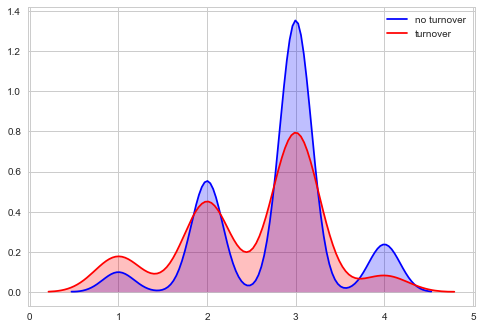

In [34]:
plt.show()

In [35]:
ax=sns.kdeplot(HRdata.loc[(HRdata['Attrition'] == 0),'MonthlyIncome'] , color='pink',shade=True,label='no turnover')
ax=sns.kdeplot(HRdata.loc[(HRdata['Attrition'] == 1),'MonthlyIncome'] , color='black',shade=True, label='turnover')
ax.set(xlabel='', ylabel='')

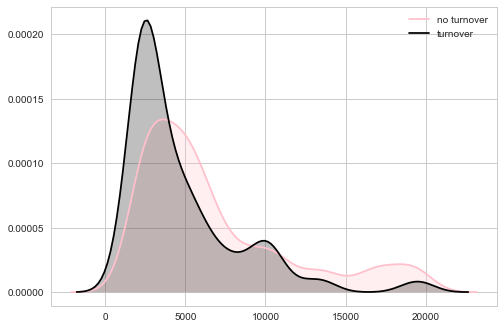

In [36]:
plt.show()

In [37]:
sns.countplot(x="PercentSalaryHike", hue = 'Attrition', data=HRdata).set_title('');

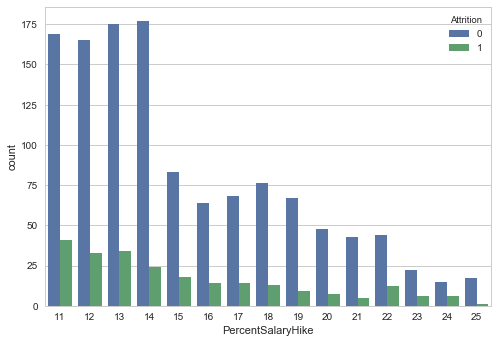

In [38]:
plt.show()

In [39]:
stats.ttest_ind?

In [42]:
HRdata.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [44]:
HRdata["Department"].value_counts(dropna=False)

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64